# Regressão linear usando Scikit-Learn

Há uma biblioteca de ferramentas open-source, e com possibilidade de uso comercial, denominada [scikit-learn](https://scikit-learn.org/stable/index.html). Essa biblioteca é vastamente utilizada no mundo e contém implementações de diversos algoritmos que iremos usar na nossa disciplina.



## Objetivos

Com este código, você irá:
- Usar o Scikit-Learn (também chamada de SK-Learn) para implementar regressão linear usando o método do gradiente

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor          # Carregando ferramentas presentes na SK-learn
from sklearn.preprocessing import StandardScaler       # Carregando ferramentas presentes na SK-learn
np.set_printoptions(precision=2)

# Método do Gradiente

Scikit-learn possui o seguinte modelo de regressão baseado no método do gradiente: [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  

Assim como em nossas implementações anteriores do método do gradiente, o modelo performa melhor normalizando-se as suas entradas. Nesse sentido, para este fim, usaremos [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) para realizar a normalização z-score. Aqui, a função que realiza tal normalização recebe o nome de 'standard scaler'.

### Carregando o banco de dados

In [3]:
file = open('dados_casas.txt') # As quatro primeiras colunas referem-se a características das casas.
                               # A quinta (última) coluna refere-se ao preço pelo qual tais casas foram negociadas
dados = np.loadtxt(file, delimiter=",") 

X_train = dados[:,0:4]
y_train = dados[:,-1] # pega apenas a última coluna. Seria o mesmo que y = dados[:,4] 

X_caracteristicas = ['size(sqft)','bedrooms','floors','age']

### Normalizando os dados

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Intervalo pico a pico por característica/coluna nos dados originais  :{np.ptp(X_train,axis=0)}")  
print(f"Intervalo pico a pico por característica/coluna nos dados escalonados:{np.ptp(X_norm,axis=0)}")

Intervalo pico a pico por característica/coluna nos dados originais  :[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Intervalo pico a pico por característica/coluna nos dados escalonados:[5.84 6.13 2.06 3.68]


### Criando e treinando o modelo de regressão

In [5]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 118, number of weight updates: 11801.0


### Acessando os parâmetros ajustados para o modelo
É importante saber que os parâmetros estarão associados com os dados de entrada *normalizados*. Os valores para tais parâmetros estão bem próximos daqueles encontrados no nosso próprio código de regressão usando o gradiente.

In [6]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"parâmetros do modelo:                   w: {w_norm}, b:{b_norm}")
print( "parâmetros do modelo (nosso código):    w: [110.61 -21.47 -32.66 -37.78], b: 362.24")

parâmetros do modelo:                   w: [110.05 -21.21 -32.39 -37.87], b:[362.2]
parâmetros do modelo (nosso código):    w: [110.61 -21.47 -32.66 -37.78], b: 362.24


### Fazendo previsões

Fazendo previsões do valor alvo para os dados de treinamento. Para isso, usaremos a rotina `predict`.

In [7]:
y_pred_sgd = sgdr.predict(X_norm)
# Opção 2: Previsão usando w,b diretamente. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"As duas previsões são iguais? {(y_pred == y_pred_sgd).all()}")

print(f"Valores obtidos de previsão:\n{y_pred[:4]}" )
print(f"Valores alvo: \n{y_train[:4]}")

As duas previsões são iguais? True
Valores obtidos de previsão:
[248.65 295.58 485.59 389.59]
Valores alvo: 
[271.5 300.  509.8 394. ]


# Um método alternativo ao Gradiente, denominado: Equação Normal


Quando falamos especificamente da **Regressão Linear**, a biblioteca Scikit-learn também possui uma ferramenta de regressão alternativa ao método do gradiente, denominada [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), que implementa uma solução fechada (não iterativa) para o problema de regressão linear, e que se baseia na *Equação Normal* do problema dos mínimos quadrados linear.

Usaremos essa outra ferramenta de regressão linear fornecida pelo Scikit-Learn e compararemos com os resultados obtidos anteriormente pelo método do gradiente.


In [8]:
from sklearn.linear_model import LinearRegression # a rotina LinearRegression do Scikit learn implementa uma solução específica para esse tipo de problema, denominada Solução Fechada da Equação Normal do problema dos mínimos quadrados

modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X_norm, y_train) 

b_LinReg = modelo_LinReg.intercept_
w_LinReg = modelo_LinReg.coef_
print(f"parâmetros do modelo (Método Equação Normal do Scikit-learn) w: {w_LinReg}, b:{b_LinReg}")
print(f"parâmetros do modelo (Método do Gradiente do Scikit-learn) w: {w_norm}, b:{b_norm}")
print( "parâmetros do modelo (nosso Método do Gradiente):    w: [110.61 -21.47 -32.66 -37.78], b: 362.24")

parâmetros do modelo (Método Equação Normal do Scikit-learn) w: [110.61 -21.47 -32.66 -37.78], b:362.23952
parâmetros do modelo (Método do Gradiente do Scikit-learn) w: [110.05 -21.21 -32.39 -37.87], b:[362.2]
parâmetros do modelo (nosso Método do Gradiente):    w: [110.61 -21.47 -32.66 -37.78], b: 362.24


## Parabéns!
Com este código, você:
- utilizou pela primeira a poderosa biblioteca, Scikit-Learn!
- implementou regressão linear usando o Método do Gradiente e Normalização de características usando essa biblioteca
- implementou regressão linear usando a rotina LinearRegression (baseada na Equação Normal) dessa biblioteca.

# Exercício
* Insira no código da Parte 1 o conjunto de medições que você já criou anteriormente para um resistor de 50 Ω, faça as adaptações necessárias e verifique os resultados.

In [53]:
r = 50
i = np.array(np.random.random(20))
v = np.ndarray(i.shape)

v = r * i + np.random.randn(i.shape[0])*5

# x_train = np.c_[i, i**2, i**3] # c_ concatena os dados
x_train = i.reshape(-1, 1) ** 2
y_train = v

scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Intervalo pico a pico por característica/coluna nos dados originais  :{np.ptp(x_train,axis=0)}")  
print(f"Intervalo pico a pico por característica/coluna nos dados escalonados:{np.ptp(x_norm,axis=0)}")
x_norm = x_train


Intervalo pico a pico por característica/coluna nos dados originais  :[0.89]
Intervalo pico a pico por característica/coluna nos dados escalonados:[2.79]


SGDRegressor(alpha=1e-06, max_iter=500000)
number of iterations completed: 1416, number of weight updates: 28321.0
parâmetros do modelo:                   w: [42.23], b:10.989606423969375
parâmetros do modelo (nosso código):    w: [110.61 -21.47 -32.66 -37.78], b: 362.24
As duas previsões são iguais? True
Valores obtidos de previsão:
[15.71 46.23 48.45 11.21]
Valores alvo: 
[24.96 42.65 54.44 -0.59]


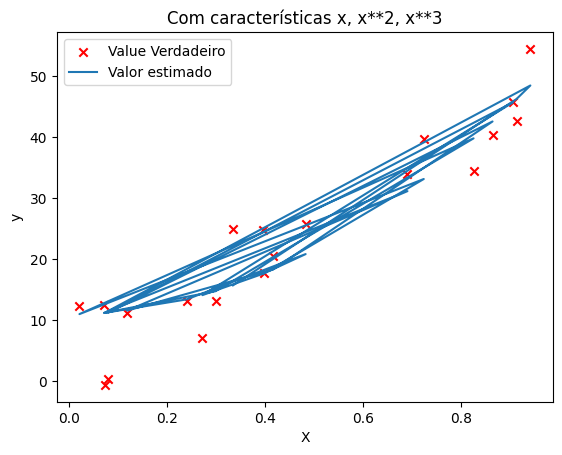

In [56]:
sgdr = SGDRegressor(max_iter=500000, alpha=0.000001)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

b_norm = sgdr.intercept_[0]
w_norm = sgdr.coef_
print(f"parâmetros do modelo:                   w: {w_norm}, b:{b_norm}")
print( "parâmetros do modelo (nosso código):    w: [110.61 -21.47 -32.66 -37.78], b: 362.24")

y_pred_sgd = sgdr.predict(x_norm)
# Opção 2: Previsão usando w,b diretamente. 
y_pred = np.dot(x_norm, w_norm) + b_norm  
print(f"As duas previsões são iguais? {(y_pred == y_pred_sgd).all()}")

print(f"Valores obtidos de previsão:\n{y_pred[:4]}" )
print(f"Valores alvo: \n{y_train[:4]}")

# Plotando os resultados
plt.scatter(i, v, marker='x', c='r', label="Value Verdadeiro"); 
plt.title("Com características x, x**2, x**3")
plt.plot(i, x_norm@w_norm + b_norm, label="Valor estimado"); 
plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

parâmetros do modelo (Método Equação Normal do Scikit-learn) w: [50.59], b:9.926685212910616
parâmetros do modelo (Método do Gradiente do Scikit-learn) w: [45.02], b:11.971989414517775


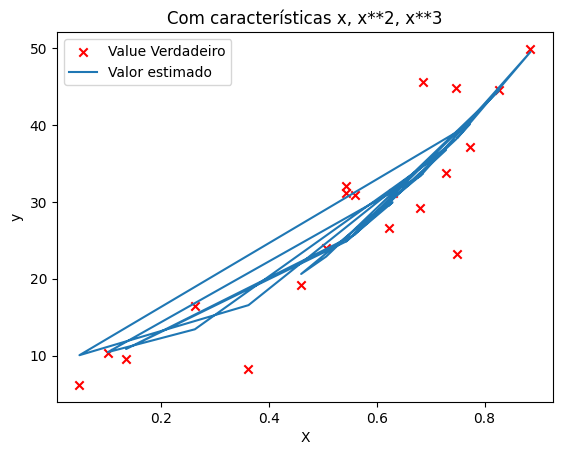

In [49]:
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(x_norm, y_train) 

b_LinReg = modelo_LinReg.intercept_
w_LinReg = modelo_LinReg.coef_
print(f"parâmetros do modelo (Método Equação Normal do Scikit-learn) w: {w_LinReg}, b:{b_LinReg}")
print(f"parâmetros do modelo (Método do Gradiente do Scikit-learn) w: {w_norm}, b:{b_norm}")

# Plotando os resultados
plt.scatter(i, v, marker='x', c='r', label="Value Verdadeiro"); 
plt.title("Com características x, x**2, x**3")
plt.plot(i, x_norm@w_LinReg + b_LinReg, label="Valor estimado"); 
plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()